# Multivariate Regression

Often using more data will result in more accurate models, since finer details can be captured. By adding additional independent variables to our model, we get a multivariate linear regression model. The only major change required to our previous model building code is the expansion of our feature matrix to include the additional independent variables.  

To demonstrate building a multi-variate regression model, the following code cell extracts both the `total_bill` and `size` features from the tips data set to use as independent variables. The `tip` feature is also extracted as the dependent variable. The data are divided once again into training and testing sets, and a multivariate regression model is constructed from the feature matrix. 

In [10]:
%run "S0-init.ipynb"

Samples from the tips dataset:
     total_bill   tip     sex smoker   day    time  size
149        7.51  2.00    Male     No  Thur   Lunch     2
8         15.04  1.96    Male     No   Sun  Dinner     2
103       22.42  3.48  Female    Yes   Sat  Dinner     2
29        19.65  3.00  Female     No   Sat  Dinner     2
121       13.42  1.68  Female     No  Thur   Lunch     2


In [11]:
# Total bill and size as independent variables
ind_data = df[['total_bill', 'size']].to_numpy()
dep_data = df.tip.values.reshape(df.shape[0], 1)

# This is the amount to hold out for 'blind' testing
frac = 0.4

# Create and fit our linear regression model with intercept
model = LinearRegression(fit_intercept=True)

tip =  0.69 +  0.09 total_bill  +  0.22 size
Multivariate LR Model score = 46.63%


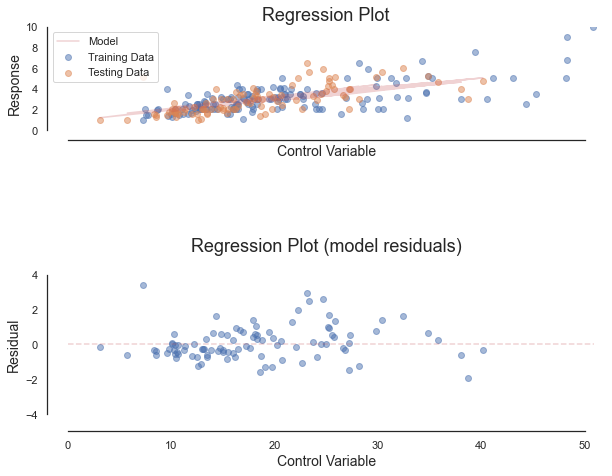

In [12]:
# Create test/train splits for data and labels
# Explicitly set our random seed to enable reproduceability
ind_train, ind_test, dep_train, dep_test \
    = train_test_split(ind_data, dep_data, test_size=frac, random_state=23)
# Fit our linear regression model to training data
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"tip = {model.intercept_[0]:5.2f} + {model.coef_[0][0]:5.2f} total_bill ",
      f"+ {model.coef_[0][1]:5.2f} size")

# Compute model predictions for test data
results = model.predict(ind_test)

# Compute score and display result (Coefficient of Determination)
score = 100.0 * model.score(ind_test, dep_test)
print(f'Multivariate LR Model score = {score:5.2f}%')

utils.make_lr_plot(ind_train[:,0], dep_train, ind_test[:,0], dep_test, results)

# Student Exercise

Now let's use the `tip` and the `size` features as independent variables to predict the `total_bill`

In [13]:
# Let's take a look at our data again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [14]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [15]:
# set total_bill as tagget or dependent variable
dep_data = df['total_bill'].values.reshape(df.shape[0], 1)
# set tips and size as independet data 
ind_data = df[['tip', 'size']].to_numpy()

# Create test/train splits for data and labels
# Explicitly set our random seed to enable reproduceability
ind_train, ind_test, dep_train, dep_test \
        = train_test_split(ind_data, dep_data, test_size = frac, 
                          random_state=23)

In [16]:
# Fit our linear regression model to training data
model.fit(ind_train, dep_train)

# Display model fit parameters for training data
print(f"total_bill = {model.intercept_[0]:5.2f} + {model.coef_[0][0]:5.2f} tip",
     f" + {model.coef_[0][1]:5.2f} size")

# compute model predictions for test data
results = model.predict(ind_test)

# compute the score of the prediction and display results:
score = 100.0 * model.score(ind_test, dep_test)
print(f'Multivariate LR Model score = {score:5.2f}%')

total_bill =  2.33 +  3.42 tip  +  3.03 size
Multivariate LR Model score = 56.70%


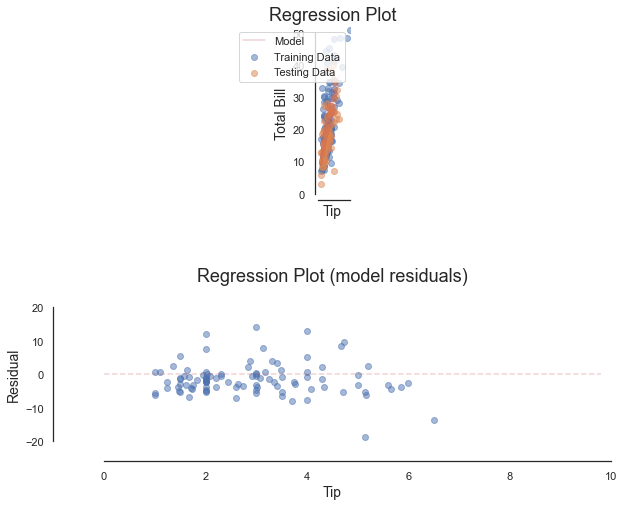

In [17]:
# plot the results using the custom lr_plot function
utils.make_lr_plot(ind_train[:,0], dep_train, ind_test[:,0], dep_test, results, 
                   xlim=(-1, 10), ylim=(-2, 52), labels=['Tip', 'Total Bill'])